# Example 3 A Robust Version of the Normal Model

A more robust version of a normal model is a model based on the Student's t-distribution, which is defined by,

$
\begin{align}
p(t \mid \nu) = \frac{\Gamma\left(\frac{\nu + 1}{2}\right)}{\sqrt{\nu \pi} \, \Gamma\left(\frac{\nu}{2}\right)} \left(1 + \frac{t^2}{\nu}\right)^{-\frac{\nu + 1}{2}}
\end{align}
\tag{1}
$

here $t$ is the random variable and $\nu$ is a parameter representing the degrees of freedom where,

1. **Mean**:
   - For $( \nu > 1 )$: The mean is 0.
   - For $( \nu \leq 1 )$: The mean is undefined.

2. **Variance**:
   - For $( \nu > 2 )$: The variance is $( \frac{\nu}{\nu - 2} )$.
   - For $( 1 < \nu \leq 2 )$: The variance is infinite.
   - For $( \nu \leq 1 )$: The variance is undefined.

3. **Shape**:
   - The t-distribution is symmetric about 0, similar to the normal distribution.
   - It has heavier tails than the normal distribution, which means it gives higher probabilities to extreme values.
   - As $\nu \to \infty$ the t-distribution converges on $\mathcal{N}(0, 1)$
   - For $\nu=1$ the Cauchy Distribution is obtained.

To obtain a $\mathcal{N}(\mu, \sigma)$ in the limit $\nu \to \infty$ make the following transformation,

$
\begin{align}
t^\prime = \sigma t + \mu
\end{align}
\tag{2}
$

Solving for $t$ gives,

$
\begin{align}
t &= \frac{t^\prime - \mu}{\sigma} \\
dt &= \frac{1}{\sigma} dt^\prime \\
\end{align}
\tag{3}
$

It follows that,

$
\begin{align}
p(t^\prime \mid \nu) = \frac{\Gamma\left(\frac{\nu + 1}{2}\right)}{\sigma\sqrt{\nu \pi} \, \Gamma\left(\frac{\nu}{2}\right)} \left(1 + \frac{\left(\frac{t^\prime - \mu}{\sigma}\right)^2}{\nu}\right)^{-\frac{\nu + 1}{2}}
\end{align}
\tag{1}
$


Assume that the parameter priors are given by,

$
\begin{align}
\mu    &\sim \mathcal{U}(l_\mu, h_\mu) \\
\sigma &\sim \mathcal{HN}(\sigma_\sigma) \\
\nu &\sim \mathcal{Exp}(\lambda)
\end{align}
\tag{1}
$

where $\mathcal{U}(l_\mu, h_\mu)$ is a Uniform distribution between $l_\mu$ amd $h_\mu$, $\mathcal{HN}(\sigma_\sigma)$ a HalfNormal distribution with scale $\sigma_\sigma$ and $\mathcal{Exp}(\lambda)$ is an exponential distribution.
The distribution of the data is assumed to have the form,

$
\begin{align}
Y \sim \mathcal{T}(\nu, \mu, \sigma)
\end{align}
\tag{2}
$

Where $\mathcal{T}(\nu, \mu, \sigma)$ with $\nu$ degrees of freedom, location $\mu$ and scale $\sigma$.

It follows that the likelihood function is given by,

$
\begin{align}
P[Y\, | \nu, \mu,\sigma] = \frac{\Gamma\left(\frac{\nu + 1}{2}\right)}{\sigma\sqrt{\nu \pi} \, \Gamma\left(\frac{\nu}{2}\right)} \left(1 + \frac{\left(\frac{t^\prime - \mu}{\sigma}\right)^2}{\nu}\right)^{-\frac{\nu + 1}{2}}
\end{align}
\tag{3}
$

In [1]:
%reload_ext autoreload
%autoreload 2

# import system modules and set local import path
import os
import sys
import numpy
from matplotlib import pyplot
from scipy import stats
import pymc
import arviz

sys.path.insert(0, os.path.abspath('../..'))

from lib import config
from lib.plots import (curve, comparison, bar, twinx_bar_line, fcurve_scatter_comparison, positive_negative_bar)

pyplot.style.use(config.glyfish_style)

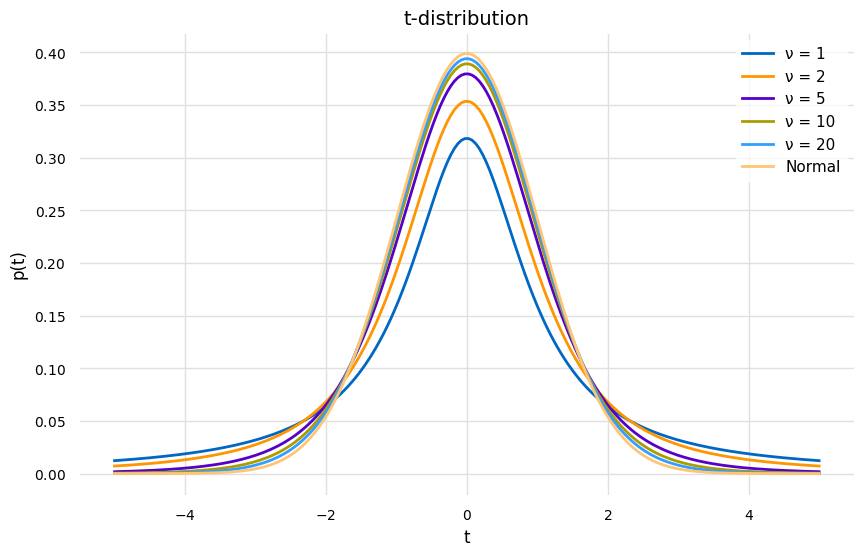

In [8]:
t_vals = numpy.linspace(-5.0, 5.0, 200)
nu_vals = [1, 2, 5, 10, 20]
t_dists = [stats.t.pdf(t_vals, nu, 0, 1) for nu in nu_vals] + [stats.norm.pdf(t_vals, 0, 1)]

labels = [f'ν = {nu}' for nu in nu_vals] + ['Normal']
comparison(t_dists, t_vals, title='t-distribution', xlabel='t', ylabel='p(t)', labels=labels, legend_loc='upper right')